In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

- This notebook is used to analyse a .csv file (containing the deltas between IMU timestamps) which is saved using a Python script. 
- The Python script can be found here: https://github.com/luxonis/depthai-python/issues/774.

In [64]:
# base_dir = './Output/2024_10_04_10_48_31/mav0/'
base_dir = './Output/2024_10_04_15_08_03/mav0/'

accelerometer_file = f'{base_dir}/imu0/acc_data.csv'
gyroscope_file = f'{base_dir}/imu0/gyro_data.csv'
frame_file = f'{base_dir}/cam0/data.csv'

In [301]:
acc_df = pd.read_csv(accelerometer_file)
gyro_df = pd.read_csv(gyroscope_file)
frame_df = pd.read_csv(frame_file)

In [340]:
df = acc_df

In [341]:
acc_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12307 entries, 0 to 12306
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #timestamp [ns]    12307 non-null  int64  
 1   a_RS_S_x [m s^-2]  12307 non-null  float64
 2   a_RS_S_y [m s^-2]  12307 non-null  float64
 3   a_RS_S_z [m s^-2]  12307 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 384.7 KB


In [342]:
timestamp_deltas = np.array([0])
timestamp_deltas = np.append(timestamp_deltas, np.diff(df['#timestamp [ns]'].values))
df['deltas'] = timestamp_deltas

In [343]:
deltas_summary = df['deltas'].describe()

In [344]:
deltas_summary

count              12307.0
mean     4997981.896481677
std     2168798.8989592586
min                    0.0
25%              3524864.0
50%              3799040.0
75%              8102528.0
max              8830976.0
Name: deltas, dtype: float64

In [346]:
df['Position'] = df.index

Text(0, 0.5, 'Deltas (ms)')

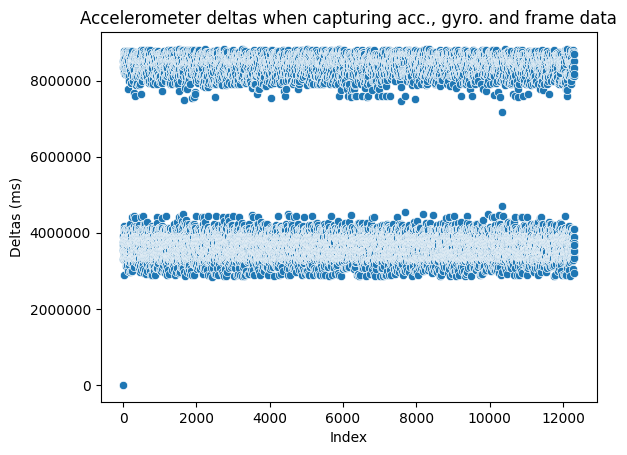

In [356]:
ax = sns.scatterplot(data=df, y='deltas', x=acc_df['Position'])

plt.title('Accelerometer deltas when capturing acc., gyro. and frame data')
# Set x-axis label
plt.xlabel('Index')
# Set y-axis label
plt.ylabel('Deltas (ms)')

In [353]:
df[df['deltas'] >= deltas_summary['mean'] + (1.0 * deltas_summary['std'])].shape[0]/df.shape[0]

0.2838222149995937

#### Investigating deeper

In [351]:
df[4000:4050][['deltas', 'Position']]

,deltas,Position
4000,8302080,4000
4001,3685888,4001
4002,3575040,4002
4003,8631040,4003
4004,3389952,4004
4005,3877120,4005
4006,3576832,4006
4007,8720128,4007
4008,3296000,4008
4009,3685888,4009


Text(0, 0.5, 'Deltas (ms)')

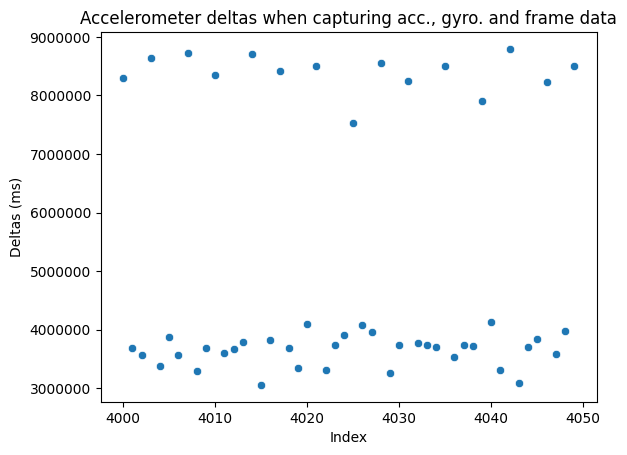

In [352]:
ax = sns.scatterplot(data=df[4000:4050], y='deltas', x=acc_df['Position'])

plt.title('Accelerometer deltas when capturing acc., gyro. and frame data')
# Set x-axis label
plt.xlabel('Index')
# Set y-axis label
plt.ylabel('Deltas (ms)')

Text(0, 0.5, 'Deltas (ms)')

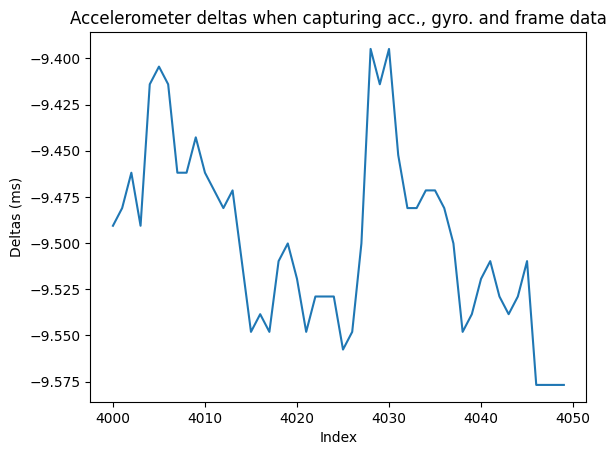

In [355]:
ax = sns.lineplot(data=df[4000:4050], y='a_RS_S_x [m s^-2]', x=acc_df['Position'])

plt.title('Accelerometer deltas when capturing acc., gyro. and frame data')
# Set x-axis label
plt.xlabel('Index')
# Set y-axis label
plt.ylabel('Deltas (ms)')

### Further Investigation

#### Looking at deltas between accelerometer and gyroscope timestamps.

In [326]:
deltas = np.absolute(acc_df['#timestamp [ns]'] - gyro_df['#timestamp [ns]']) / 1000000

In [327]:
deltas

0       1.981184
1       3.229184
2       0.408064
3       1.587968
4       2.902016
          ...   
12302   0.692992
12303      2.464
12304   3.844096
12305   0.295168
12306   1.872896
Name: #timestamp [ns], Length: 12307, dtype: float64

In [328]:
acc_gyro_ts_df = pd.DataFrame(data = {'deltas': deltas, 'Position': acc_df.index})

In [329]:
acc_gyro_ts_df

,deltas,Position
0,1.981184,0
1,3.229184,1
2,0.408064,2
3,1.587968,3
4,2.902016,4
...,...,...
12302,0.692992,12302
12303,2.464,12303
12304,3.844096,12304
12305,0.295168,12305


In [330]:
deltas_summary = acc_gyro_ts_df['deltas'].describe()

In [331]:
deltas_summary

count              12307.0
mean    1.7710977986511742
std     1.2121526179643283
min               0.003072
25%               0.508928
50%               1.709056
75%               2.886528
max               5.187072
Name: deltas, dtype: float64

Text(0, 0.5, 'Deltas (ms)')

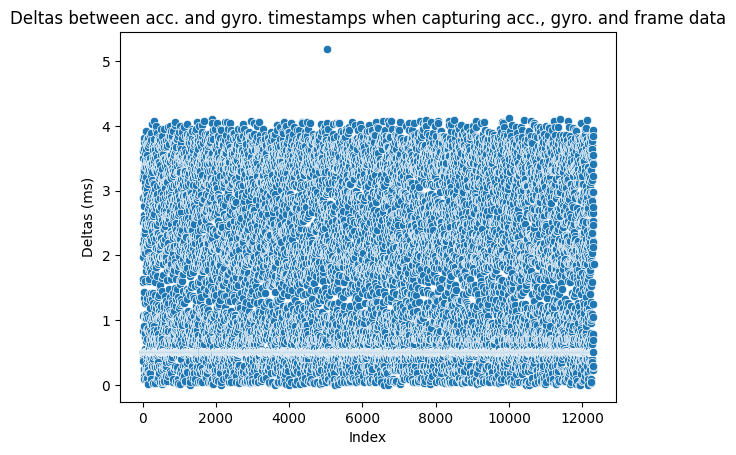

In [332]:
ax = sns.scatterplot(data=acc_gyro_ts_df, y='deltas', x=acc_df.index)

plt.title('Deltas between acc. and gyro. timestamps when capturing acc., gyro. and frame data')
# Set x-axis label
plt.xlabel('Index')
# Set y-axis label
plt.ylabel('Deltas (ms)')

<Axes: ylabel='deltas'>

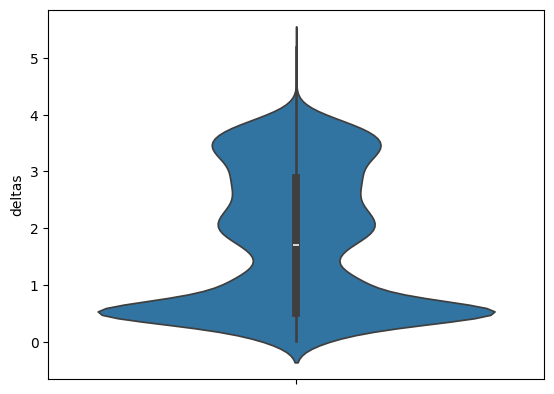

In [333]:
sns.violinplot(data=acc_gyro_ts_df, y='deltas')

### Plotting Gyro and Accel timestamps 

In [174]:
acc_df.head(5)

,#timestamp [ns],a_RS_S_x [m s^-2],a_RS_S_y [m s^-2],a_RS_S_z [m s^-2],deltas,Position
0,1728068885115799808,0.057461,-0.172383,9.509769,0,0
1,1728068885119345920,0.057461,-0.162806,9.528923,3546112,1
2,1728068885127863040,0.086191,-0.181959,9.576807,8517120,2
3,1728068885131169024,0.057461,-0.181959,9.538500,3305984,3
4,1728068885134919936,0.067038,-0.162806,9.595961,3750912,4


In [175]:
gyro_df.head(5)

,#timestamp [ns],w_RS_S_x [rad s^-1],w_RS_S_y [rad s^-1],w_RS_S_z [rad s^-1],deltas,Position
0,1728068885117780992,-0.005326,-0.005326,-0.003196,0,0
1,1728068885122575104,0.005326,0.000000,0.003196,4794112,1
2,1728068885127454976,0.007457,-0.003196,0.000000,4879872,2
3,1728068885132756992,0.001065,-0.003196,-0.001065,5302016,3
4,1728068885137821952,0.003196,-0.004261,-0.002131,5064960,4


In [176]:
acc_df['name'] = 'Acc'
gyro_df['name'] = 'Gyro'

In [197]:
merged_acc_gyro_df = pd.concat([acc_df[['#timestamp [ns]', 'name', 'Position']], gyro_df[['#timestamp [ns]', 'name', 'Position']]])

In [198]:
merged_acc_gyro_df.head(5)

,#timestamp [ns],name,Position
0,1728068885115799808,Acc,0
1,1728068885119345920,Acc,1
2,1728068885127863040,Acc,2
3,1728068885131169024,Acc,3
4,1728068885134919936,Acc,4


In [202]:
merged_acc_gyro_df_melted= pd.melt(merged_acc_gyro_df, id_vars=['#timestamp [ns]', 'Position'], value_vars=['name'])

In [203]:
merged_acc_gyro_df_melted.head(5)

,#timestamp [ns],Position,variable,value
0,1728068885115799808,0,name,Acc
1,1728068885119345920,1,name,Acc
2,1728068885127863040,2,name,Acc
3,1728068885131169024,3,name,Acc
4,1728068885134919936,4,name,Acc


In [204]:
merged_acc_gyro_df_melted

,#timestamp [ns],Position,variable,value
0,1728068885115799808,0,name,Acc
1,1728068885119345920,1,name,Acc
2,1728068885127863040,2,name,Acc
3,1728068885131169024,3,name,Acc
4,1728068885134919936,4,name,Acc
...,...,...,...,...
24609,1728068946607546112,12302,name,Gyro
24610,1728068946612848896,12303,name,Gyro
24611,1728068946617953024,12304,name,Gyro
24612,1728068946622583040,12305,name,Gyro


In [334]:
shift = 0
amount_to_display = 50
start_first_sensor = 0 + shift
start_next_sensor = 12307 + shift

In [335]:
df_to_display = pd.concat([merged_acc_gyro_df_melted[start_next_sensor:start_next_sensor+amount_to_display], 
                           merged_acc_gyro_df_melted[start_first_sensor:start_first_sensor+amount_to_display]])

In [336]:
df_to_display['#timestamp [ns]'] = df_to_display['#timestamp [ns]'] / 1000000

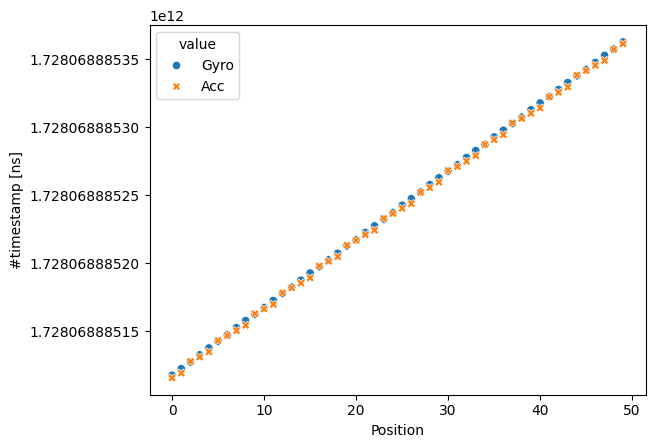

In [339]:
sns.scatterplot(data=df_to_display, x="Position", y="#timestamp [ns]", hue="value", style="value")
plt.ticklabel_format(useOffset=False)
plt.show()